<a href="https://colab.research.google.com/github/usseif97/MRNET-for-Knee-Diagnosis/blob/master/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Library Imports**

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as npl
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization



### **Import DataSet**

In [0]:
from keras.datasets import cifar10


## **Get DataSet**

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x_train - training data(images), y_train - labels(digits)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 13s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples



##  Define Variables

In [0]:
num_classes = 10
BATCH_NORM = False


## **Preprocessing and split Data into test and validation**

In [0]:

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255.
x_test /= 255.

## **Define Model**

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))

model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))

model.add(layers.MaxPooling2D((2,2), strides=(2, 2)))

model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))

model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))

model.add(layers.MaxPooling2D((2,2), strides=(2, 2)))

model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))

model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))

model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))

model.add(layers.MaxPooling2D((2,2), strides=(2, 2)))

model.add(layers.Conv2D(512, (3,3), activation='relu', padding='same'))

model.add(layers.Conv2D(512, (3,3), activation='relu', padding='same'))

model.add(layers.Conv2D(512, (3,3), activation='relu', padding='same'))

model.add(layers.MaxPooling2D((2,2), strides=(2, 2)))

model.add(layers.Conv2D(512, (3,3), activation='relu', padding='same'))

model.add(layers.Conv2D(512, (3,3), activation='relu', padding='same'))

model.add(layers.Conv2D(512, (3,3), activation='relu', padding='same'))

model.add(layers.MaxPooling2D((2,2), strides=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(4096, activation='relu'))

model.add(layers.Dense(4096, activation='relu'))

model.add(layers.Dense(num_classes, activation='softmax'))


In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 128)      

## **Compile Model**

In [0]:
model.compile(loss="categorical_crossentropy",  # Because we have multiClasses and get the label Y in one hot
              optimizer="sgd", # Stochastic gradient descent
              metrics=["accuracy"])

## **Fit Model**

In [32]:
model_history= model.fit(x_train, y_train, batch_size=64, epochs=25, validation_data=(x_test,y_test))

Epoch 1/25
782/782 [==============================] - 33s 42ms/step - loss: 2.3021 - accuracy: 0.1086 - val_loss: 2.3017 - val_accuracy: 0.1431
Epoch 2/25
782/782 [==============================] - 33s 42ms/step - loss: 2.3008 - accuracy: 0.1338 - val_loss: 2.2987 - val_accuracy: 0.1652
Epoch 3/25
782/782 [==============================] - 33s 42ms/step - loss: 2.2881 - accuracy: 0.1716 - val_loss: 2.2545 - val_accuracy: 0.1752
Epoch 4/25
782/782 [==============================] - 33s 42ms/step - loss: 2.1503 - accuracy: 0.1939 - val_loss: 2.0878 - val_accuracy: 0.2149
Epoch 5/25
782/782 [==============================] - 33s 42ms/step - loss: 2.0476 - accuracy: 0.2315 - val_loss: 1.9610 - val_accuracy: 0.2649
Epoch 6/25
782/782 [==============================] - 33s 42ms/step - loss: 1.9510 - accuracy: 0.2585 - val_loss: 1.9069 - val_accuracy: 0.2509
Epoch 7/25
782/782 [==============================] - 33s 42ms/step - loss: 1.8580 - accuracy: 0.2901 - val_loss: 2.2034 - val_accuracy:

## **Plot Results**

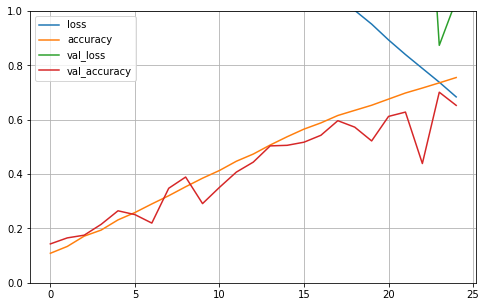

In [34]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()